In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Mango\Downloads\Compressed\archive\glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 10)

In [5]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
# checking the datatypes
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [11]:
df['RI'].value_counts()

RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64

In [12]:
RI_count = df['RI'].value_counts()

In [13]:
RI_count

RI
1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: count, Length: 178, dtype: int64

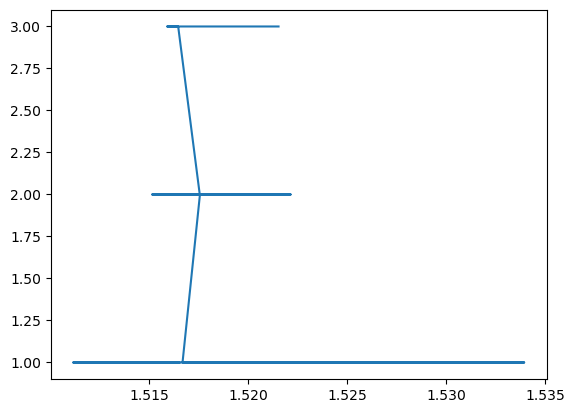

In [14]:
plt.plot(RI_count)

In [15]:
Na_count = df['Na'].value_counts()
Na_count

Na
13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: count, Length: 142, dtype: int64

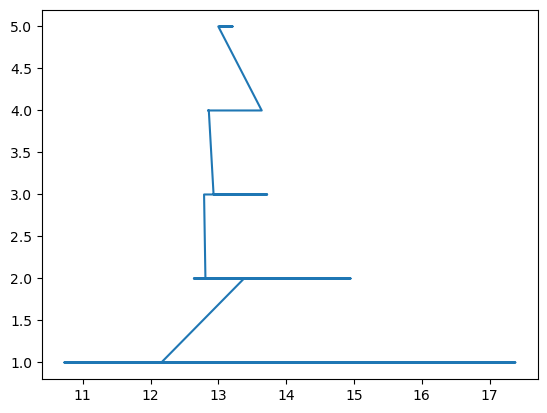

In [16]:
plt.plot(Na_count)

In [17]:
Mg_count = df['Mg'].value_counts()
Mg_count

Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64

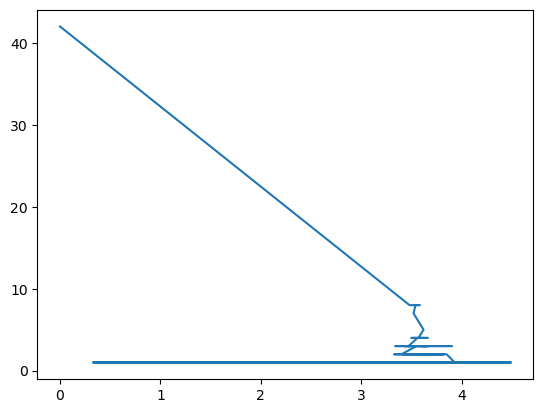

In [18]:
plt.plot(Mg_count)

In [19]:
Al_count = df['Al'].value_counts()
Al_count

Al
1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: count, Length: 118, dtype: int64

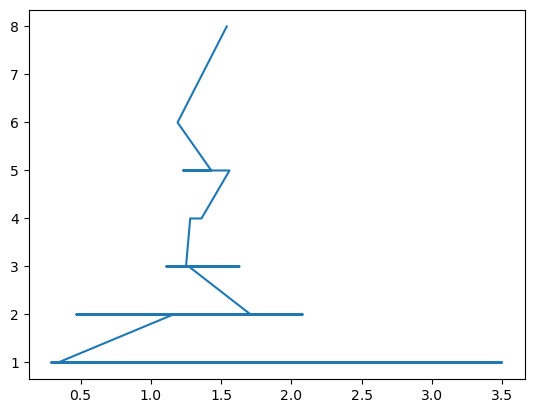

In [20]:
plt.plot(Al_count)

In [21]:
Si_counts = df['Si'].value_counts()
Si_counts

Si
72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: count, Length: 133, dtype: int64

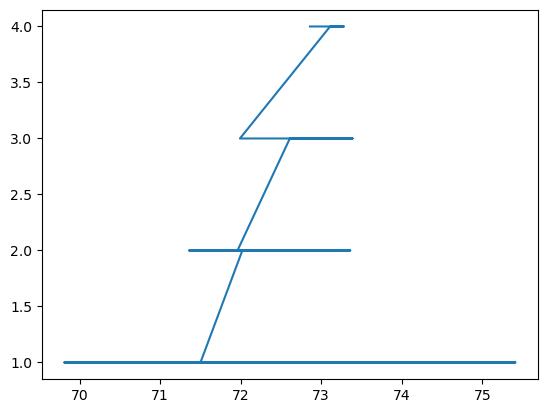

In [22]:
plt.plot(Si_counts)

In [24]:
K_count = df['K'].value_counts()
K_count

K
0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: count, Length: 65, dtype: int64

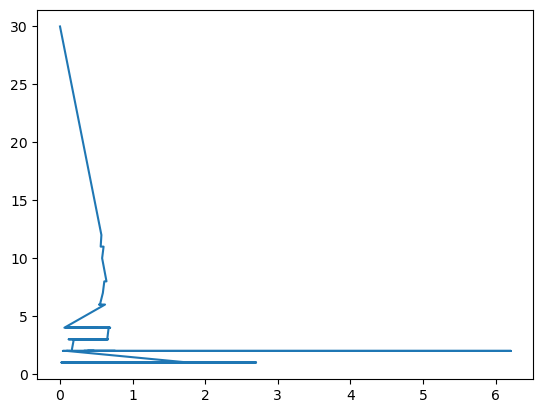

In [25]:
plt.plot(K_count)

In [26]:
Ca_count = df['Ca'].value_counts()
Ca_count

Ca
8.03    5
8.43    5
9.57    4
8.79    4
8.44    4
       ..
9.23    1
8.90    1
9.13    1
8.09    1
8.62    1
Name: count, Length: 143, dtype: int64

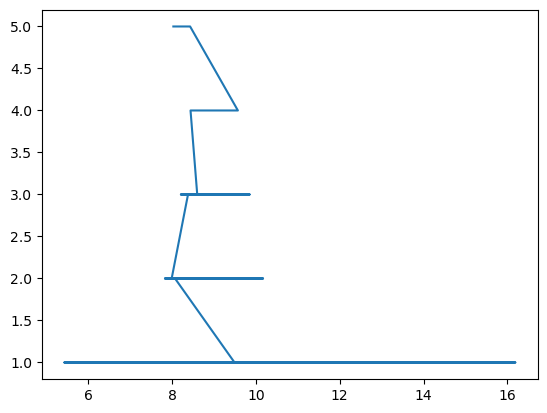

In [27]:
plt.plot(Ca_count)

In [28]:
Ba_count = df['Ba'].value_counts()
Ba_count

Ba
0.00    176
0.64      2
1.57      2
0.09      2
1.59      2
0.11      2
3.15      1
0.81      1
1.64      1
1.06      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
0.27      1
0.69      1
0.40      1
0.14      1
0.76      1
1.68      1
1.63      1
1.19      1
0.24      1
2.20      1
0.15      1
0.06      1
1.67      1
Name: count, dtype: int64

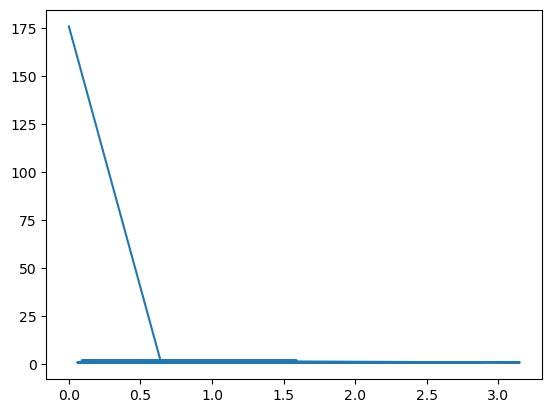

In [29]:
plt.plot(Ba_count)

In [30]:
Fe_count = df['Fe'].value_counts()
Fe_count

Fe
0.00    144
0.24      7
0.17      7
0.09      6
0.10      5
0.11      4
0.16      3
0.28      3
0.12      3
0.22      3
0.14      3
0.07      3
0.19      2
0.15      2
0.08      2
0.06      1
0.21      1
0.05      1
0.51      1
0.37      1
0.35      1
0.25      1
0.18      1
0.34      1
0.29      1
0.30      1
0.20      1
0.32      1
0.26      1
0.03      1
0.31      1
0.01      1
Name: count, dtype: int64

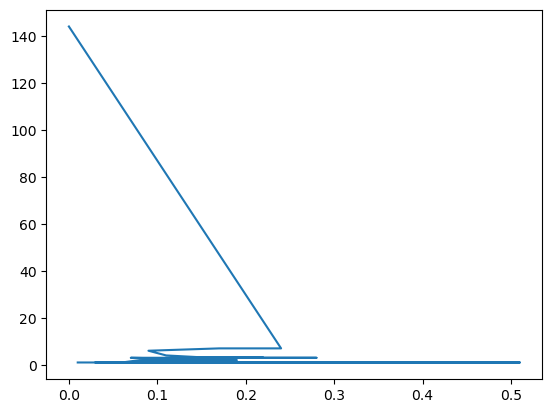

In [31]:
plt.plot(Fe_count)

Text(0.5, 1.0, 'Element RI')

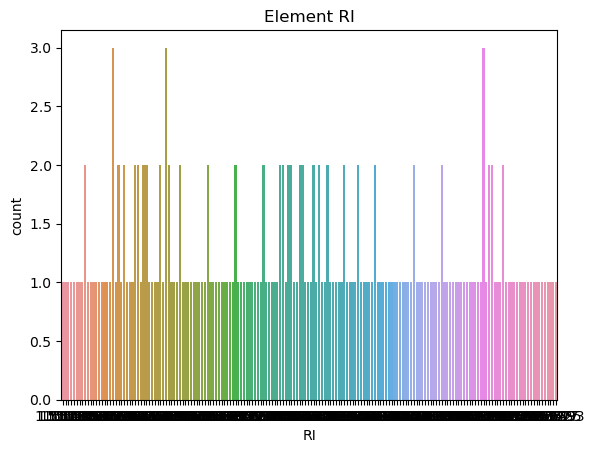

In [32]:
sns.countplot(x = df['RI'])
plt.title('Element RI')

Text(0.5, 1.0, 'Element Na')

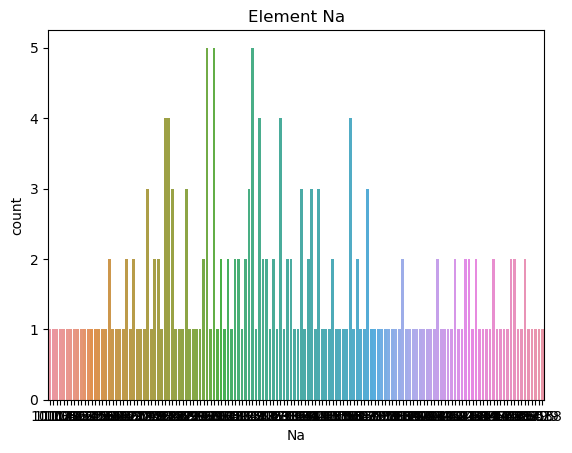

In [33]:
sns.countplot(x = df['Na'])
plt.title('Element Na')

Text(0.5, 1.0, 'Element Mg')

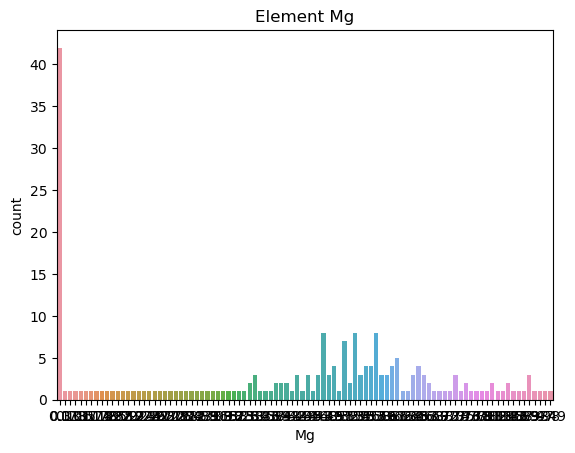

In [34]:
sns.countplot(x = df['Mg'])
plt.title('Element Mg')

Text(0.5, 1.0, 'Element Al')

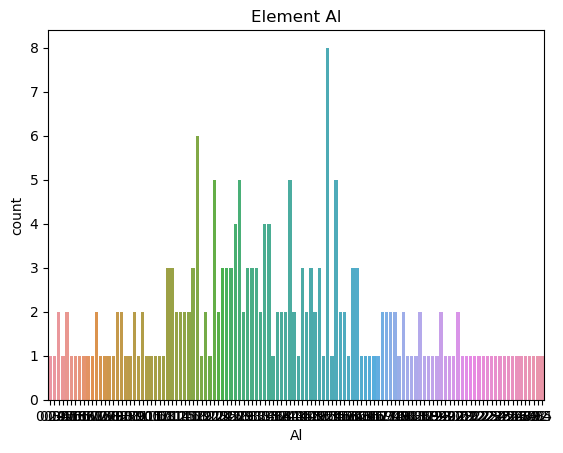

In [35]:
sns.countplot(x = df['Al'])
plt.title('Element Al')

Text(0.5, 1.0, 'Element Si')

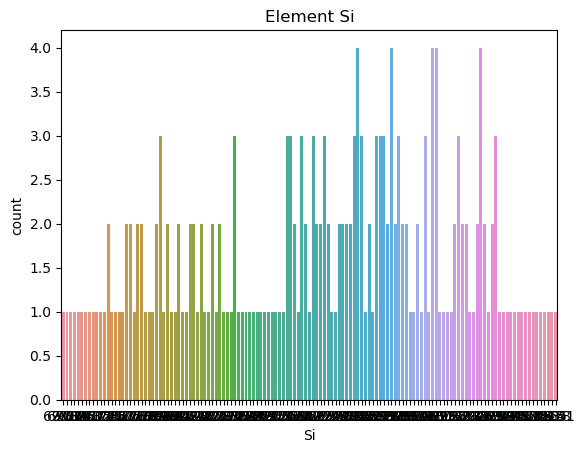

In [36]:
sns.countplot(x = df['Si'])
plt.title('Element Si')

Text(0.5, 1.0, 'Element K')

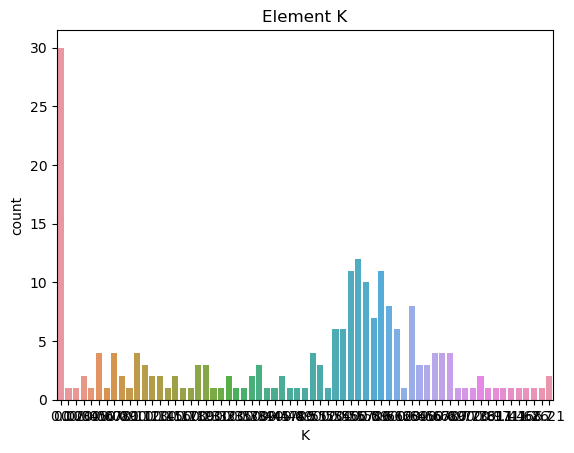

In [37]:
sns.countplot(x = df['K'])
plt.title('Element K')

Text(0.5, 1.0, 'Element Ca')

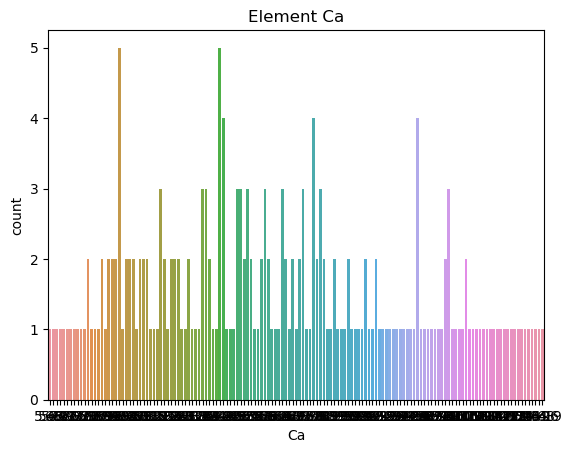

In [38]:
sns.countplot(x = df['Ca'])
plt.title('Element Ca')

Text(0.5, 1.0, 'Element Ba')

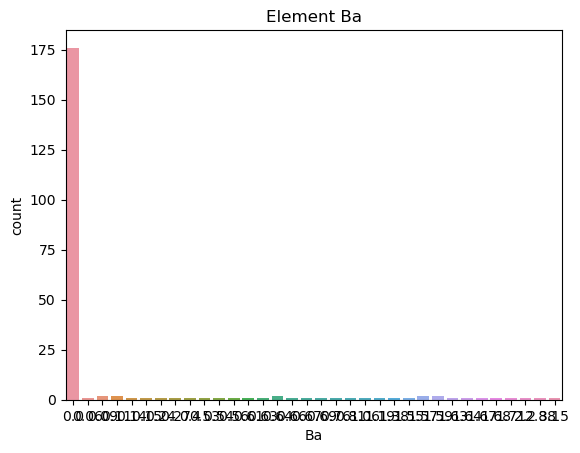

In [39]:
sns.countplot(x = df['Ba'])
plt.title('Element Ba')

Text(0.5, 1.0, 'Element Fe')

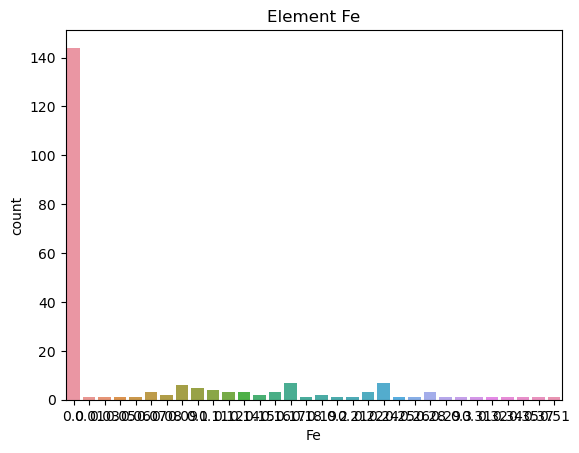

In [40]:
sns.countplot(x = df['Fe'])
plt.title('Element Fe')

<function matplotlib.pyplot.show(close=None, block=None)>

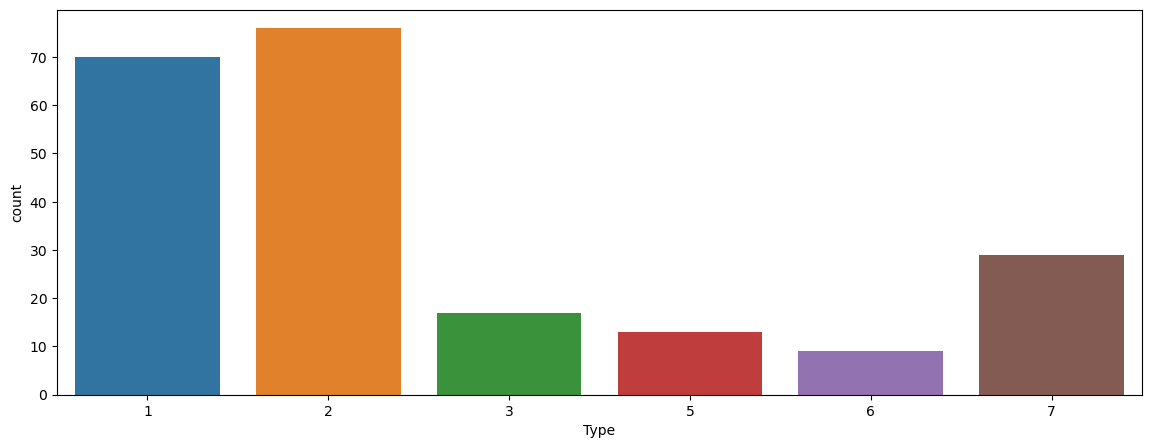

In [41]:
# The count of perticular types of glasses
fig = plt.figure(figsize = (14,5))
sns.countplot(x = df['Type'])
plt.show

In [42]:
# Correlations
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

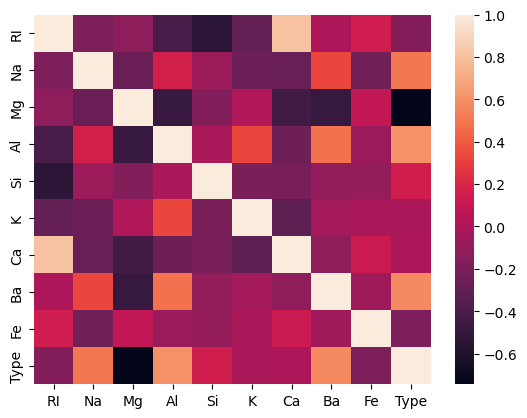

In [43]:
sns.heatmap(df.corr())
plt.show

In [44]:
el = df.columns.tolist()
el

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

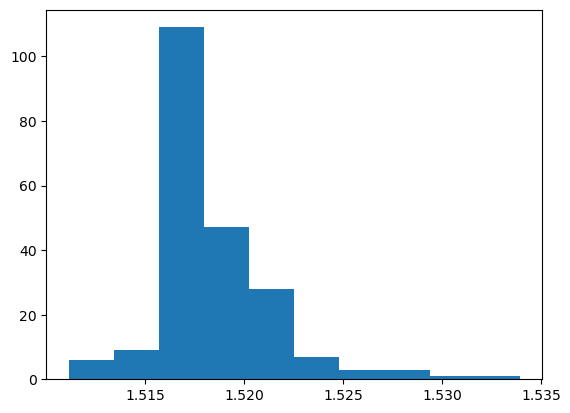

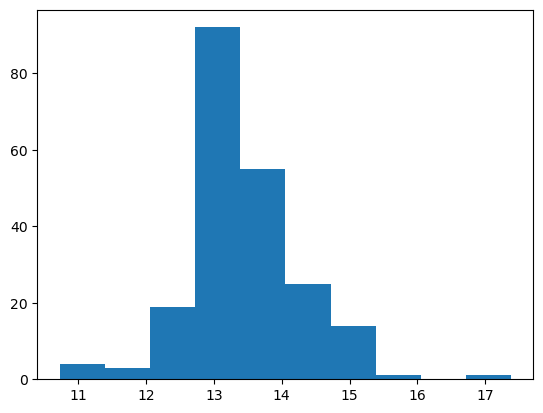

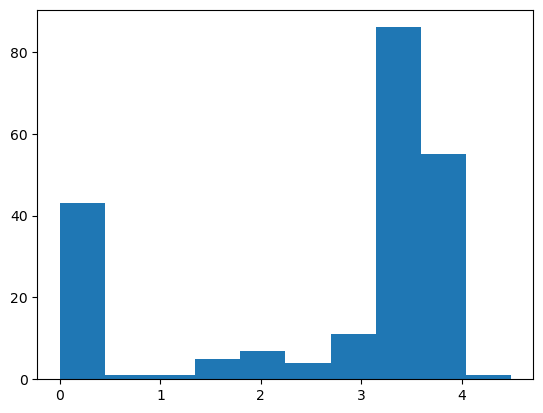

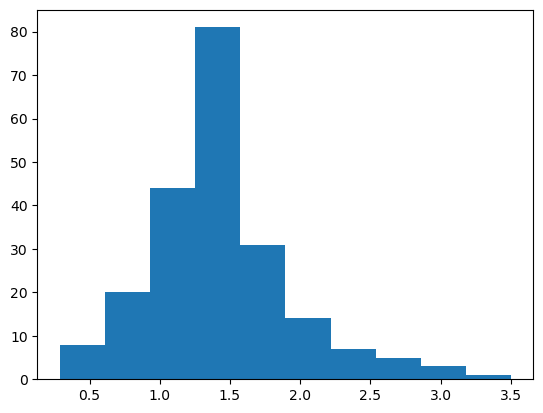

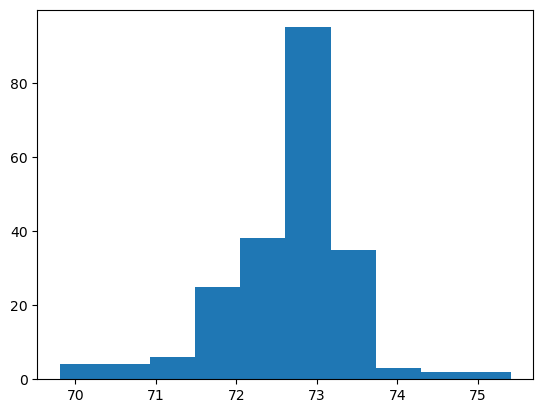

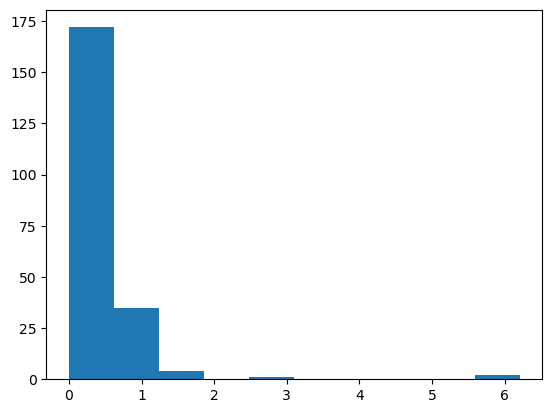

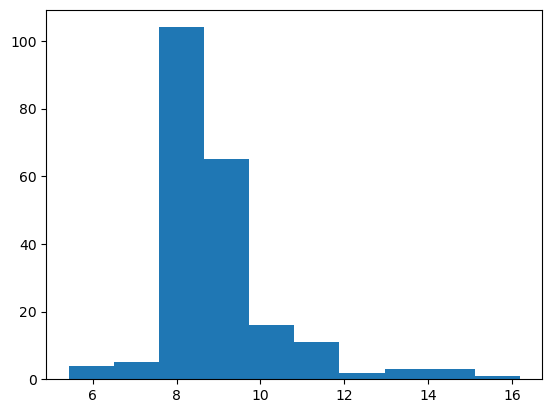

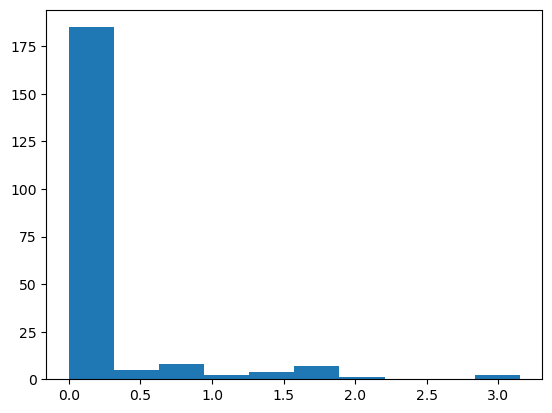

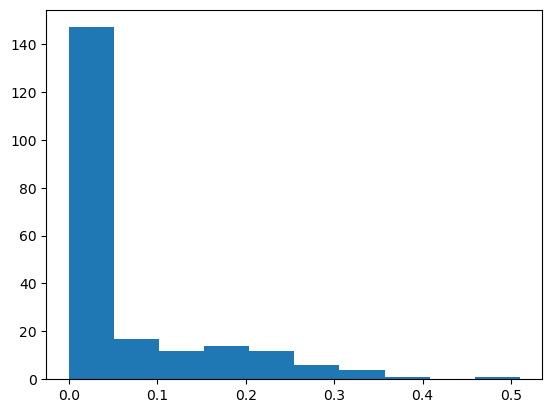

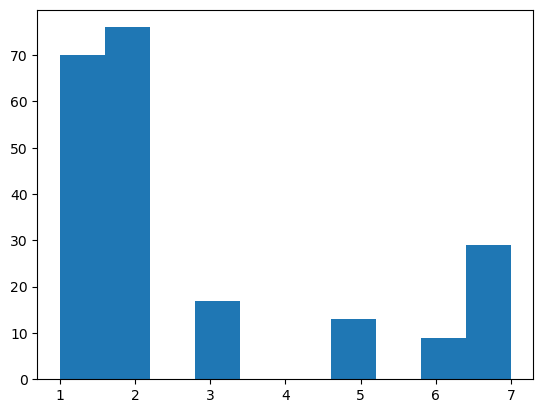

In [45]:
for i in el:
    plt.hist(df[i])
    plt.show()

C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because n

C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Mango\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been

<Figure size 900x900 with 0 Axes>

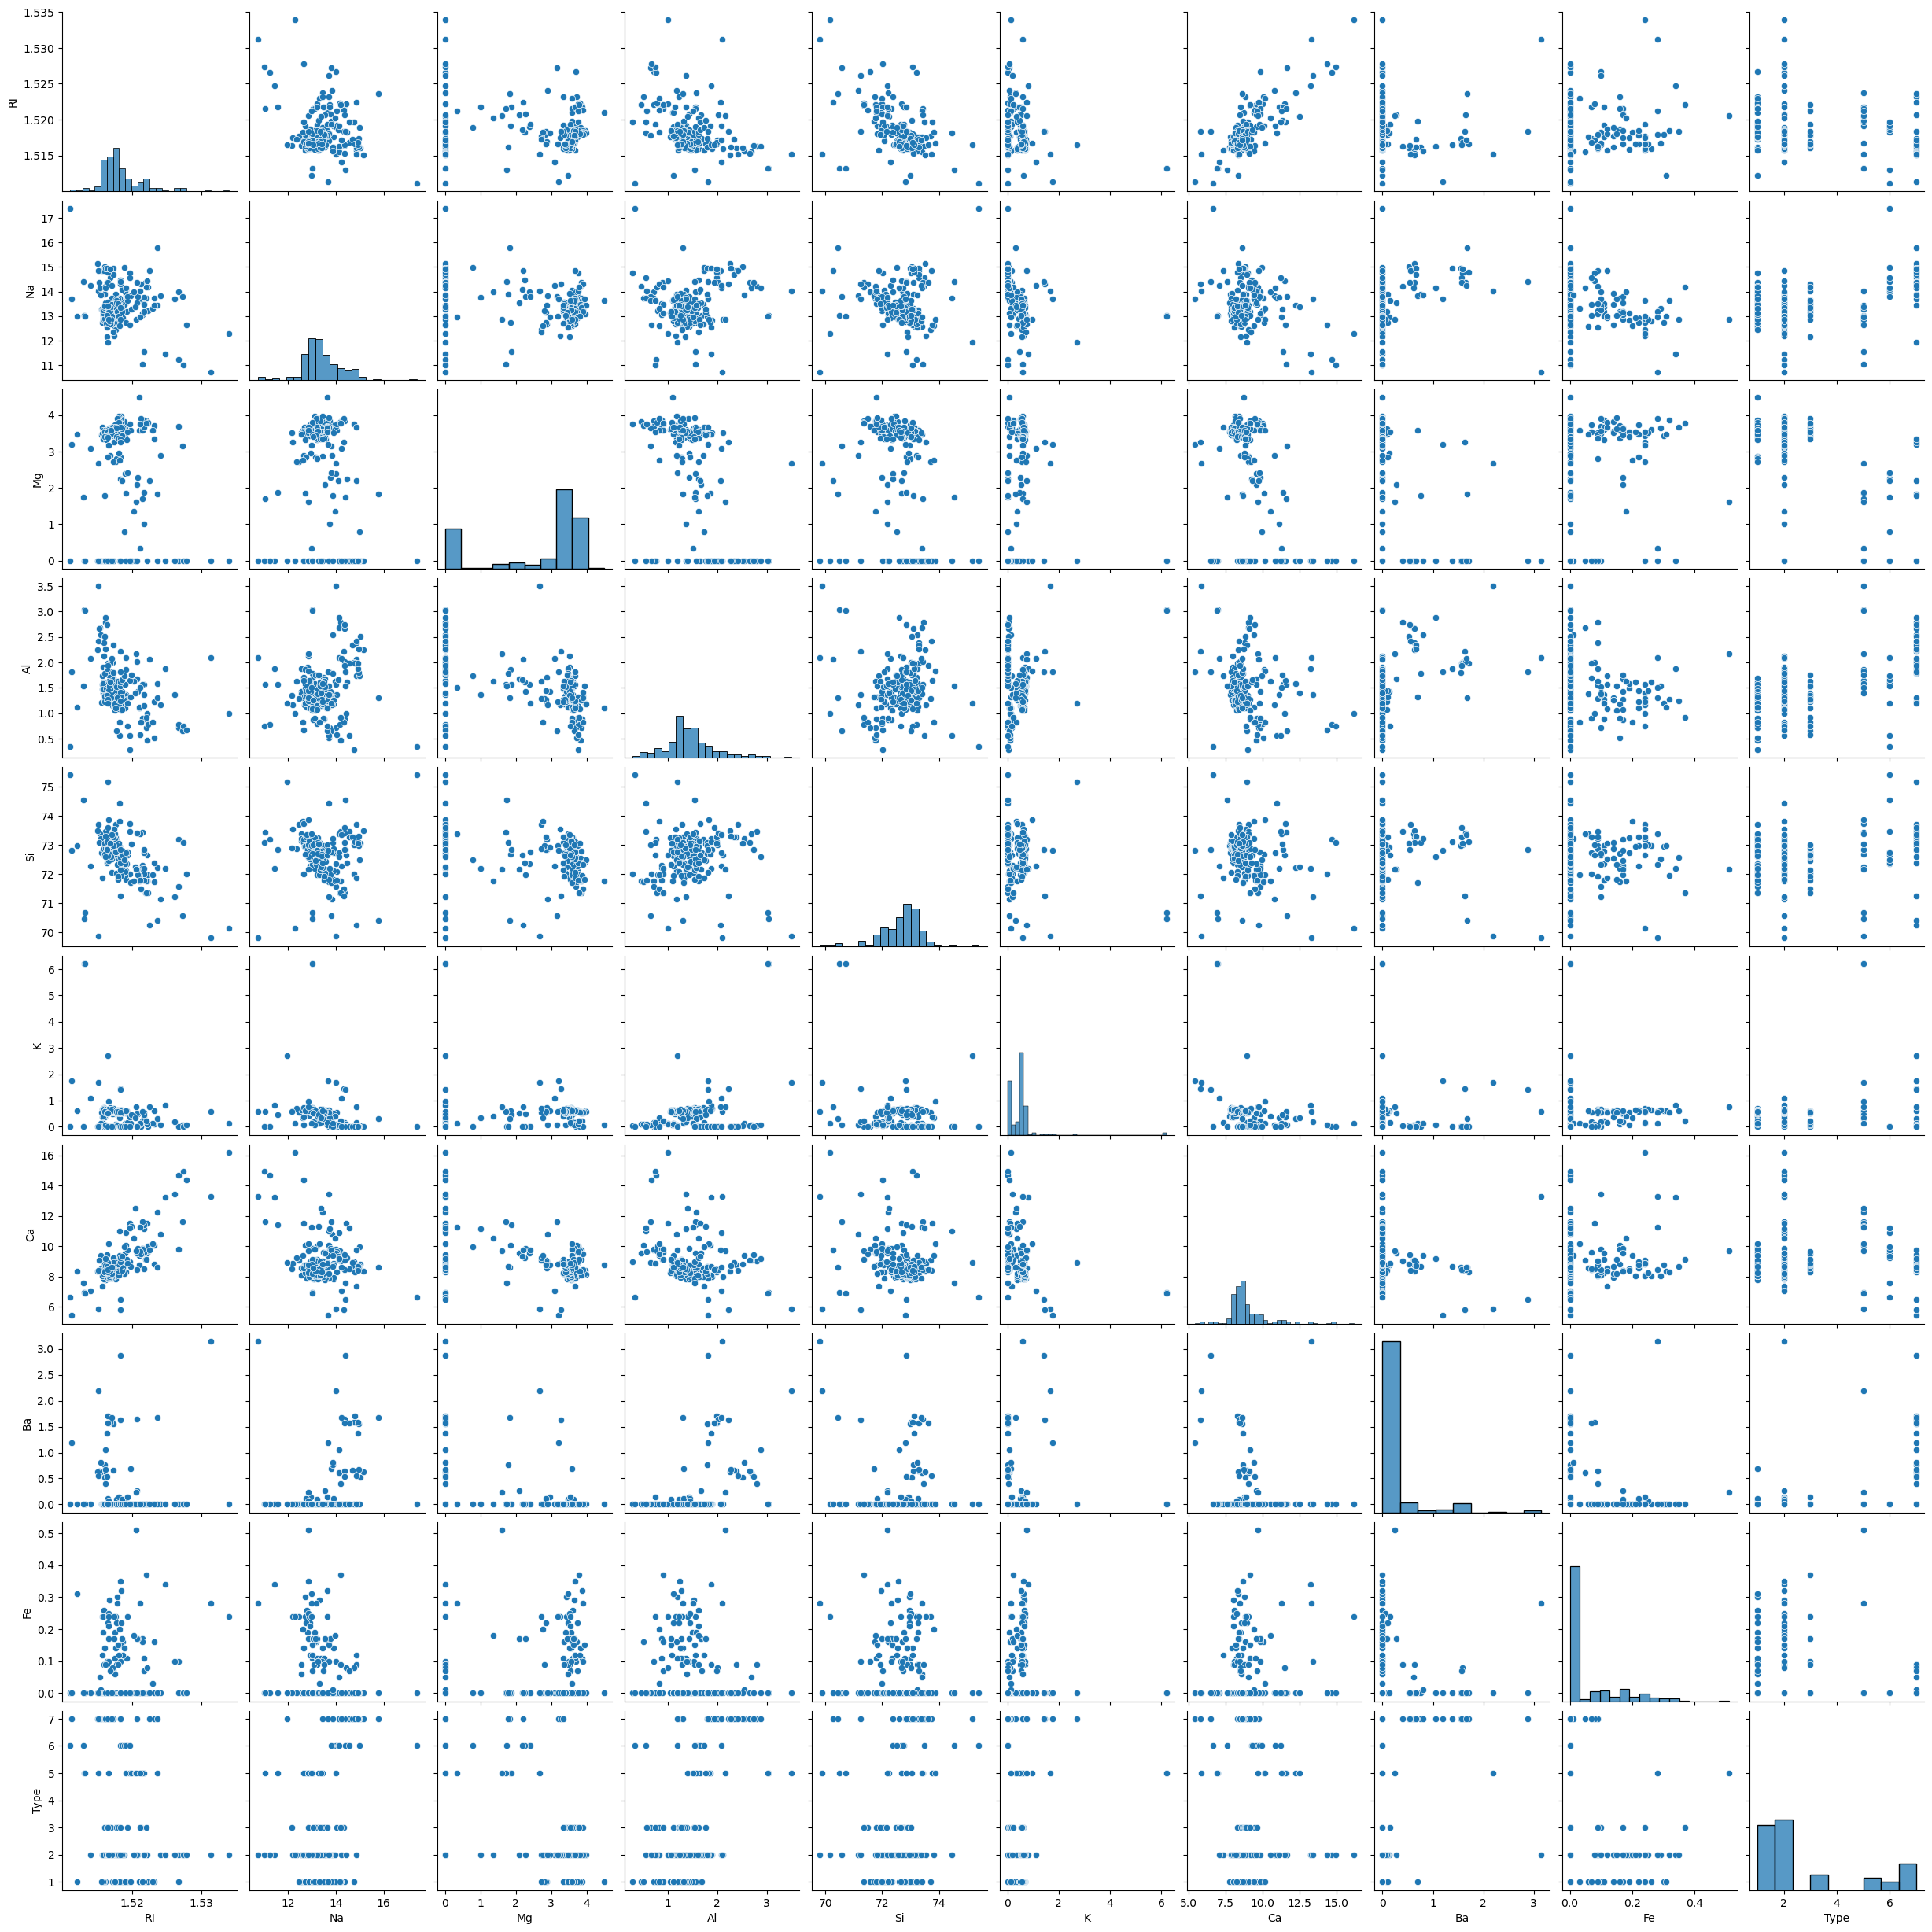

In [46]:
plt.figure(figsize=(9,9))
sns.pairplot(df[el],palette='coolwarm')
plt.show()

In [47]:
# checking types values count 
print(df.groupby('Type')['Type'].count())

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64


In [48]:
X = df.iloc[:,:9]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [49]:
X.shape

(214, 9)

In [50]:
Y = df.iloc[:,-1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)
X_train.shape

(149, 9)

In [53]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [54]:
prediction = model.predict(X_test)

In [55]:
prediction

array([6, 7, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 2, 7, 2, 2, 2, 1, 2, 1, 1, 7,
       1, 3, 3, 1, 2, 2, 2, 1, 5, 6, 1, 1, 1, 2, 3, 2, 5, 2, 1, 7, 7, 1,
       7, 1, 1, 1, 2, 7, 1, 3, 2, 2, 2, 2, 5, 1, 1, 7, 2, 7, 2, 3, 1],
      dtype=int64)

Classification_report:               precision    recall  f1-score   support

           1       0.77      0.80      0.78        25
           2       0.63      0.57      0.60        21
           3       0.33      0.29      0.31         7
           5       0.33      0.50      0.40         2
           6       0.50      1.00      0.67         1
           7       0.78      0.78      0.78         9

    accuracy                           0.66        65
   macro avg       0.56      0.66      0.59        65
weighted avg       0.66      0.66      0.66        65

Accuracy score: 66.15384615384615
Classification_report: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001FE56894810>


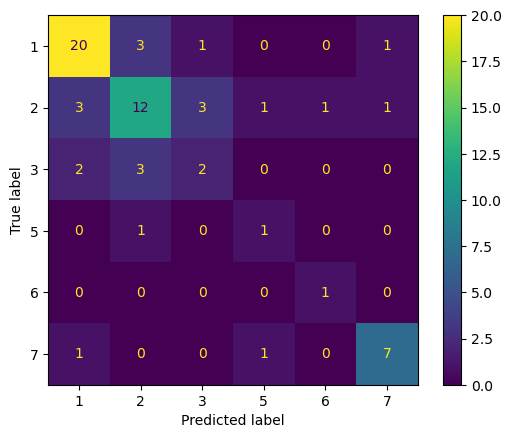

In [56]:
print("Classification_report:",classification_report(Y_test,prediction))
print("Accuracy score:",accuracy_score(Y_test,prediction)*100)
print("Classification_report:",ConfusionMatrixDisplay.from_predictions(Y_test,prediction))

In [58]:
# Random Forest 
rf=RandomForestClassifier(n_estimators=25,criterion='entropy') 
rf.fit(X_train,Y_train)
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([6, 7, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 7,
       2, 1, 2, 3, 2, 2, 2, 1, 5, 6, 1, 1, 1, 1, 3, 2, 5, 1, 1, 7, 7, 1,
       7, 1, 2, 1, 2, 7, 1, 2, 2, 2, 5, 2, 7, 1, 7, 7, 2, 2, 2, 2, 1],
      dtype=int64)

Classification_report:               precision    recall  f1-score   support

           1       0.81      0.88      0.85        25
           2       0.82      0.86      0.84        21
           3       0.50      0.14      0.22         7
           5       0.67      1.00      0.80         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         9

    accuracy                           0.82        65
   macro avg       0.72      0.81      0.73        65
weighted avg       0.80      0.82      0.79        65

Accuracy score: 81.53846153846153
Classification_report: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001FE5C140450>


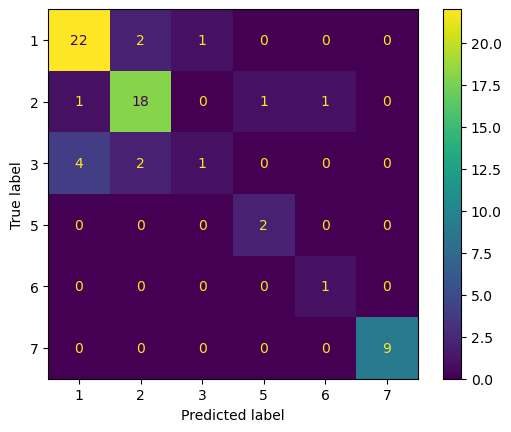

In [60]:
print("Classification_report:",classification_report(Y_test,y_pred_rf))
print("Accuracy score:",accuracy_score(Y_test,y_pred_rf)*100)
print("Classification_report:",ConfusionMatrixDisplay.from_predictions(Y_test,y_pred_rf))